In [94]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
# datase 1 - vehicle registrations
registrations = pd.read_csv('data/vehicle_registrations.csv')

registrations.rename(columns={'Electric (EV)': 'Electric'}, inplace=True)

for column_name, values in registrations.items():
    if column_name != 'State':
        registrations[column_name] = registrations[column_name].replace({',': ''}, regex=True).astype(int)

columns_to_remove = ['Plug-In Hybrid Electric (PHEV)', 'Hybrid Electric (HEV)']
registrations['Hybrid'] = registrations[columns_to_remove].sum(axis=1)
registrations.drop(columns=columns_to_remove, inplace=True)

columns_to_remove = ['Gasoline', 'Diesel']
registrations['Fuel'] = registrations[columns_to_remove].sum(axis=1)
registrations.drop(columns=columns_to_remove, inplace=True)

columns_to_remove = ['Biodiesel', 'Ethanol/Flex (E85)', 'Compressed Natural Gas (CNG)', 'Propane', 'Hydrogen', 'Methanol', 'Unknown Fuel']
registrations['Other'] = registrations[columns_to_remove].sum(axis=1)
registrations.drop(columns=columns_to_remove, inplace=True)

In [96]:
# dataset 2 - alternative fuel stations
columns_to_keep = ['State', 'Latitude', 'Longitude', 'Open Date']

stations = pd.read_csv('data/alt_fuel_stations (Dec 2 2023).csv', usecols=columns_to_keep, engine='python')

stations['Open Date'] = pd.to_datetime(stations['Open Date'], format='%Y-%m-%d')

In [97]:
# dataset 3 - USA
usa = pd.read_csv('data/usa.csv')

columns_to_int = ['Population', 'Land_area']
usa[columns_to_int] = usa[columns_to_int].replace({',': ''}, regex=True).apply(pd.to_numeric)

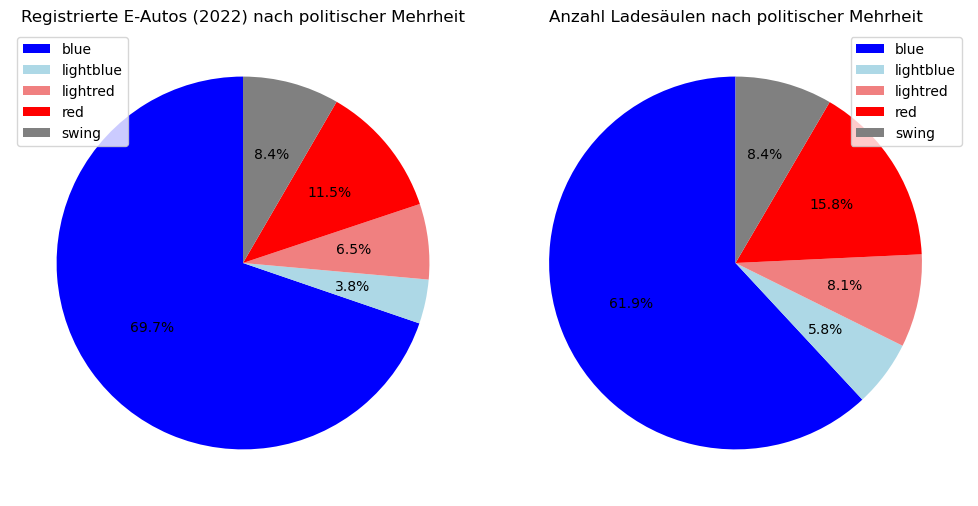

In [128]:
# registrations / plolitischer Mehrheit - stations / politischer Mehrheit 
reg_vote = registrations[registrations['Year'] == 2022]
reg_vote = pd.merge(registrations, usa, on='State')
reg_vote = reg_vote.groupby('Vote')['Electric'].sum().reset_index(name='Count')

stations_vote = pd.merge(stations, usa, left_on='State', right_on='Abbreviation')
stations_vote = stations_vote.groupby('Vote').size().reset_index(name='Count')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(reg_vote['Count'], autopct='%1.1f%%', startangle=90, colors=['blue', 'lightblue', 'lightcoral', 'red', 'grey'])
axs[0].set_title('Registrierte E-Autos (2022) nach politischer Mehrheit')
axs[0].set_xticks(axs[0].get_xticks())
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90, fontsize=8)
axs[0].legend(stations_vote['Vote'], loc="upper left")

axs[1].pie(stations_vote['Count'], autopct='%1.1f%%', startangle=90, colors=['blue', 'lightblue', 'lightcoral', 'red', 'grey'])
axs[1].set_title('Anzahl Ladesäulen nach politischer Mehrheit')
axs[1].set_xticks(axs[1].get_xticks())
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90, fontsize=8)
axs[1].legend(stations_vote['Vote'], loc="upper right")

plt.tight_layout()
plt.show()

In [120]:
reg_vote.info()

,Vote,Count
0,blue,4379100
1,lightblue,240500
2,lightred,411000
3,red,722200
4,swing,525600
